# Stationarity Test

In [87]:
import pandas as pd
from pandas import read_csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

In [88]:
import yfinance as yf

In [89]:
#tick = 'BVSP'
#stock = pd.read_html('https://br.financas.yahoo.com/quote/^%s/history?p=^%s' % (tick, tick))
#stock[0].head()
#BVSP = pd.DataFrame({'indice': stock[0]['Fechamento*'], 'day': stock[0]['Data']})
#BVSP.head()
#plt.figure(figsize=(15,9))
#plt.plot(BVSP['indice'].astype(float))
#plt.show()

In [144]:
DJI = yf.Ticker("DJI")

In [145]:
hist = DJI.history(period="5y")

In [146]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-10-02,22557.599609,22557.599609,22557.599609,22557.599609,229042383,0,0
2017-10-03,22641.699219,22641.699219,22641.699219,22641.699219,213844748,0,0
2017-10-04,22661.599609,22661.599609,22661.599609,22661.599609,206730434,0,0
2017-10-05,22775.400391,22775.400391,22775.400391,22775.400391,204118006,0,0
2017-10-06,22773.699219,22773.699219,22773.699219,22773.699219,173553030,0,0


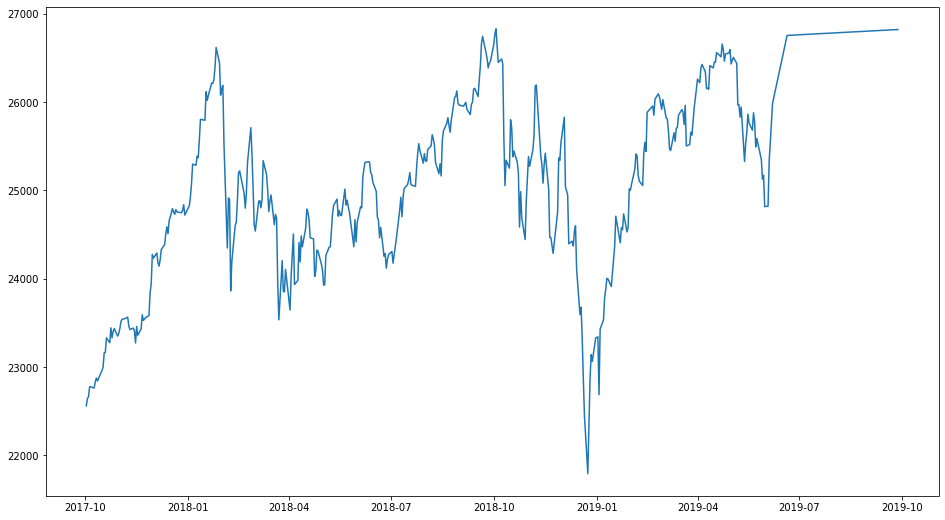

In [147]:
plt.figure(figsize=(16,9))
plt.plot(hist['Close'])
plt.show()

In [148]:
def stationarity_test(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

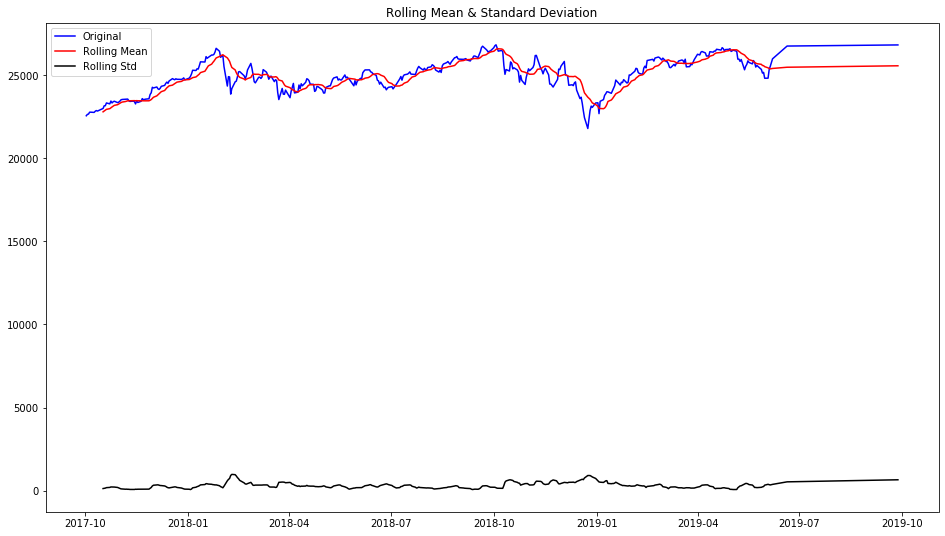

In [149]:
stationarity_test(hist['Close'])

In [113]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset["Close"][i] - dataset["Close"][i - interval]
        diff.append(value)
    return (diff)

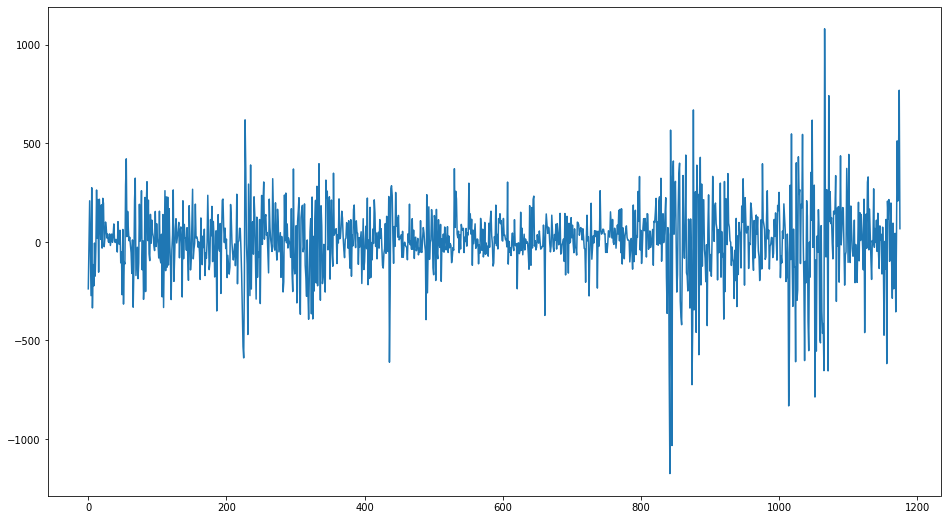

In [114]:
diff = difference(hist)
plt.figure(figsize=(16,9))
plt.plot(diff)
plt.show()